##  Optimization manual steps

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# loss function single MLP
def loss_single(target, output):
    total_loss = (output - target)*(output - target)
    total_loss.type="l"
    return total_loss

In [3]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, nout], weightsinit=2, lastReLU=False, debug_bw=True
)  # 2-layer neural network
xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs= ", xinput[0].data)
print("parameters")
pp.pprint(model.parameters())

xtarget = Value(1.2, type="t")  # desired targets

inputs=  1
parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0),
    Value(name=v005,layernumber=L2,neuronnumber=n1,weightnumber=,type=w1,data=0.6000000000000001, grad=0),
    Value(name=v006,layernumber=L2,neuronnumber=n1,weightnumber=,type=w2,data=1.2000000000000002, grad=0),
    Value(name=v007,layernumber=L2,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]


In [4]:
# Optimization Step
def opt_step():
    #### forward pass0
    activation = model(xinput)
    loss = loss_single(activation, xtarget)
    print("loss= ", loss.data)

    #### backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    draw_dot(loss, debug_print_01=False)

    #### update
    for p in model.parameters():
        p.data += -0.1 * p.grad
    print("updated parameters")
    pp.pprint(model.parameters())

In [5]:
opt_step()

loss=  0.0899999999999999
backward mul   v020   0.00 ->   0.30 v023   0.00 ->   0.30
backward mul   v017   0.00 ->  -0.30 v018   0.00 ->   0.27
backward mul   v017  -0.30 ->  -0.60 v021   0.00 ->   0.27
backward mul   v006   0.00 ->  -0.30 v013   0.00 ->  -0.72
backward mul   v003   0.00 ->  -0.72 v008   0.00 ->  -0.36
backward mul   v005   0.00 ->  -0.30 v011   0.00 ->  -0.36
backward mul   v001   0.00 ->  -0.36 v008  -0.36 ->  -0.54
updated parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.536, grad=-0.3599999999999998),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0.03599999999999998, grad=-0.3599999999999998),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.572, grad=-0.7199999999999996),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0.07199999999999997, grad=-0.7199999999999996),
    Value(name=v005,layernumber=L2,neuronnumber=n1,weightnumber=,typ

In [6]:
opt_step()

loss=  0.00015575040000000671
backward mul   v035   0.00 ->  -0.01 v038   0.00 ->  -0.01
backward mul   v032   0.00 ->   0.01 v033   0.00 ->  -0.02
backward mul   v032   0.01 ->   0.02 v036   0.00 ->  -0.02
backward mul   v005   0.00 ->   0.01 v026   0.00 ->   0.02
backward mul   v001   0.00 ->   0.02 v008  -0.54 ->  -0.53
backward mul   v006   0.00 ->   0.02 v028   0.00 ->   0.03
backward mul   v003   0.00 ->   0.03 v008  -0.53 ->  -0.51
updated parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.53442752, grad=0.01572480000000034),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0.03442751999999995, grad=0.01572480000000034),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5689299199999999, grad=0.030700800000000666),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0.0689299199999999, grad=0.030700800000000666),
    Value(name=v005,layernumber=L2,neuronnumb

In [7]:
opt_step()

loss=  1.924307144587318e-06
backward mul   v050   0.00 ->   0.00 v053   0.00 ->   0.00
backward mul   v047   0.00 ->  -0.00 v048   0.00 ->   0.00
backward mul   v047  -0.00 ->  -0.00 v051   0.00 ->   0.00
backward mul   v006   0.00 ->  -0.00 v043   0.00 ->  -0.00
backward mul   v003   0.00 ->  -0.00 v008  -0.51 ->  -0.52
backward mul   v005   0.00 ->  -0.00 v041   0.00 ->  -0.00
backward mul   v001   0.00 ->  -0.00 v008  -0.52 ->  -0.52
updated parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.5346019103390734, grad=-0.0017439033907345597),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0.0346019103390734, grad=-0.0017439033907345597),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5692707237578708, grad=-0.003408037578709738),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0.06927072375787087, grad=-0.003408037578709738),
    Value(name=v005,layernumbe

In [8]:
opt_step()

loss=  2.2378438939116735e-08
backward mul   v065   0.00 ->  -0.00 v068   0.00 ->  -0.00
backward mul   v062   0.00 ->   0.00 v063   0.00 ->  -0.00
backward mul   v062   0.00 ->   0.00 v066   0.00 ->  -0.00
backward mul   v006   0.00 ->   0.00 v058   0.00 ->   0.00
backward mul   v003   0.00 ->   0.00 v008  -0.52 ->  -0.52
backward mul   v005   0.00 ->   0.00 v056   0.00 ->   0.00
backward mul   v001   0.00 ->   0.00 v008  -0.52 ->  -0.52
updated parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.5345830994574998, grad=0.000188108815736075),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0.034583099457499794, grad=0.000188108815736075),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5692339663705671, grad=0.0003675738730365447),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0.06923396637056721, grad=0.0003675738730365447),
    Value(name=v005,layernumber

In [9]:
opt_step()

loss=  2.6201799969117974e-10
backward mul   v080   0.00 ->   0.00 v083   0.00 ->   0.00
backward mul   v077   0.00 ->  -0.00 v081   0.00 ->   0.00
backward mul   v077  -0.00 ->  -0.00 v078   0.00 ->   0.00
backward mul   v005   0.00 ->  -0.00 v071   0.00 ->  -0.00
backward mul   v001   0.00 ->  -0.00 v008  -0.52 ->  -0.52
backward mul   v006   0.00 ->  -0.00 v073   0.00 ->  -0.00
backward mul   v003   0.00 ->  -0.00 v008  -0.52 ->  -0.52
updated parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.5345851348494619, grad=-2.0353919620625744e-05),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0.03458513484946186, grad=-2.0353919620625744e-05),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5692379436724003, grad=-3.9773018332517416e-05),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0.06923794367240046, grad=-3.9773018332517416e-05),
    Value(name=v005,la

[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.5345851348494619, grad=-2.0353919620625744e-05),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0.03458513484946186, grad=-2.0353919620625744e-05),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5692379436724003, grad=-3.9773018332517416e-05),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0.06923794367240046, grad=-3.9773018332517416e-05),
    Value(name=v005,layernumber=L2,neuronnumber=n1,weightnumber=,type=w1,data=0.628714923149438, grad=-1.8426152440871513e-05),
    Value(name=v006,layernumber=L2,neuronnumber=n1,weightnumber=,type=w2,data=1.2285525056130941, grad=-2.0669722621833304e-05),
    Value(name=v007,layernumber=L2,neuronnumber=n1,weightnumber=,type=b,data=0.05775475734093978, grad=-3.237394011801342e-05)]
loss=  3.0655970301513623e-12


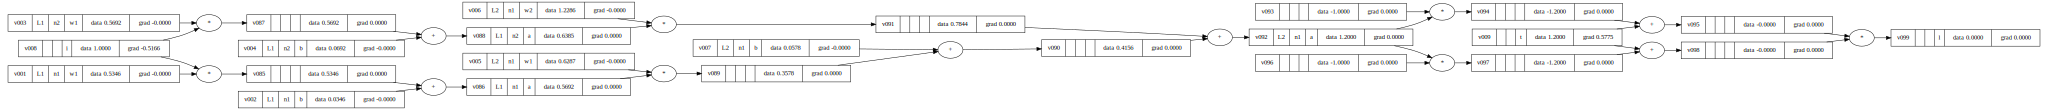

In [10]:
pp.pprint(model.parameters())
activation = model(xinput)
loss = loss_single(activation, xtarget)
print("loss= ", loss.data)
draw_dot(loss)